# Capomulin Research Study
250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Capomulin versus the nine other treatment regimens.

## Observations and Insights

Look across all figures and tables below and write at least three observations or inferences that can be made from the data.

## Dependencies and starter code

#### Hints and Considerations
Use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, x-axis and y-axis limits, etc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st # Used for SEM Calcs(?)
import numpy as np

# Map to study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read in the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_results_complete = pd.merge(
    mouse_metadata, study_results,
    how="left",
    on=["Mouse ID", "Mouse ID"])

## Summary statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [24]:
# Isolate tumor volume data
tumor_vol_all = study_results_complete['Tumor Volume (mm3)']

#Create empty summary data frame
tumor_summary_data = pd.DataFrame({
    "Drug Regimen":study_results_complete['Drug Regimen'].unique()
})

# Add statistics columns
tumor_summary_data['Mean'] = 0
tumor_summary_data['Median'] = 0
tumor_summary_data['Variance'] = 0
tumor_summary_data['Standard Deviation'] = 0
tumor_summary_data['SEM'] = 0

In [25]:
for drug in range(len(tumor_summary_data)):
    
    # store the total tumor volume for each drug
    # In the'tumor_vol_all' table, return only the results for the given regimen
    total_tumor_vol_by_regimen = tumor_vol_all[study_results_complete['Drug Regimen'] ==
                                               tumor_summary_data.loc[drug,'Drug Regimen']]
    # Calculate and store the mean for each regimen
    tumor_summary_data.loc[drug,'Mean'] = np.mean(total_tumor_vol_by_regimen)
    
    # Calculate and store the median for each regimen
    tumor_summary_data.loc[drug,'Median'] = np.median(total_tumor_vol_by_regimen)
    
    # Calculate and store the variance for each regimen
    tumor_summary_data.loc[drug,'Variance'] =  np.var(total_tumor_vol_by_regimen, ddof=1)
    
    # Calculate and store the standard deviation for each regimen
    tumor_summary_data.loc[drug,'Standard Deviation'] = np.std(total_tumor_vol_by_regimen, ddof=1)
    
    # Calculate and store the Standard Error of Mean (SEM) for each regimen
    tumor_summary_data.loc[drug,'SEM'] = st.sem(total_tumor_vol_by_regimen)

In [26]:
# print the summary table
tumor_summary_data

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots
Generate a bar plot showing number of data points for each treatment regimen...

*The following plots should look identical*

** Consider side-by-side bars

https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

../01-Lesson-Plans/05-Matplotlib/2/Activities/02-Ins_PandasPlot/Solved/avg_state_rain.ipynb


In [27]:
mean_tumor_vol = tumor_summary_data['Mean']

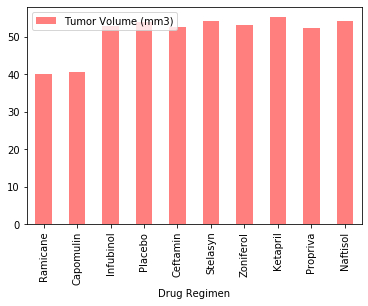

In [28]:
# Using Pandas 'DataFrame.plot()'
>>> df = pd.DataFrame({'Drug Regimen':study_results_complete['Drug Regimen'].unique(), 'Tumor Volume (mm3)':mean_tumor_vol})
>>> ax = df.plot.bar(x='Drug Regimen', y='Tumor Volume (mm3)', color='r', alpha=0.5, align="center")

<BarContainer object of 10 artists>

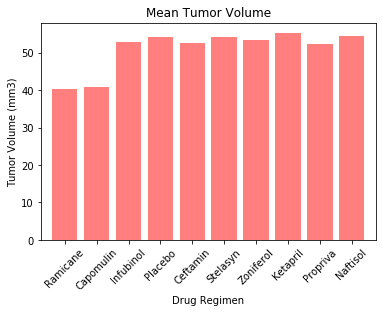

In [29]:
# Using Matplotlib's pyplot
mean_tumor_vol = tumor_summary_data['Mean']
x_axis = np.arange(len(mean_tumor_vol))

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, study_results_complete['Drug Regimen'].unique(), rotation=45)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(mean_tumor_vol)*1.05)

# Give our chart some labels and a tile
plt.title("Mean Tumor Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.bar(x_axis, mean_tumor_vol, color='r', alpha=0.5, align="center")

## Pie plots
Generate a pie plot showing the distribution of female versus male mice...

*The following plots should look identical*

In [30]:
# Using Pandas 'DataFrame.plot()'

In [31]:
# Using Matplotlib's pyplot

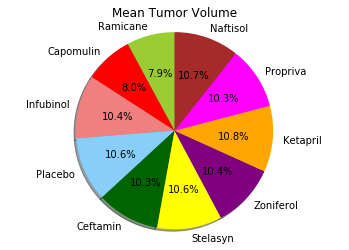

In [32]:
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "darkgreen", "yellow", "purple", "orange", "magenta", "brown"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title("Mean Tumor Volume")
plt.pie(mean_tumor_vol, explode=explode, labels=study_results_complete['Drug Regimen'].unique(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [34]:
# Review complete data
study_results_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# From complete data for the last tumor volume meas (45) 'and' Drug Regimen is 1 of 4 given.
df_fin_tumor_vol_top_4 = study_results_complete[(study_results_complete["Timepoint"] == 45) &
                                             (
                                                 (study_results_complete["Drug Regimen"] == "Ramicane") |
                                                 (study_results_complete["Drug Regimen"] == "Capomulin") |
                                                 (study_results_complete["Drug Regimen"] == "Infubinol") |
                                                 (study_results_complete["Drug Regimen"] == "Ceftamin")
                                             )]

In [36]:
df_fin_tumor_vol_top_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [37]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across
# all four treatment regimens

In [38]:
fin_tumor_vol_top_4 = df_fin_tumor_vol_top_4["Tumor Volume (mm3)"]
#np.mean(fin_tumor_vol_top_4)

In [39]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = fin_tumor_vol_top_4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 33.48002734
The upper quartile of final tumor volume is: 62.14221369
The interquartile range of final tumor volume is: 28.66218635
The the median of final tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


In [40]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
# and highlight any potential outliers in the plot by changing their color and style.

## Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help
## with changing the style of the outliers.
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
# ../01-Lesson-Plans/05-Matplotlib/3/Activities/02-Ins_Quartiles_and_Outliers/Solved/samples.ipynb

In [41]:
fin_tumor_vol_ra = study_results_complete[(study_results_complete["Timepoint"] == 45) &
                                             (study_results_complete["Drug Regimen"] == "Ramicane")]["Tumor Volume (mm3)"]

fin_tumor_vol_ca = study_results_complete[(study_results_complete["Timepoint"] == 45) &
                                             (study_results_complete["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"]

fin_tumor_vol_in = study_results_complete[(study_results_complete["Timepoint"] == 45) &
                                             (study_results_complete["Drug Regimen"] == "Infubinol")]["Tumor Volume (mm3)"]

fin_tumor_vol_ce = study_results_complete[(study_results_complete["Timepoint"] == 45) &
                                             (study_results_complete["Drug Regimen"] == "Ceftamin")]["Tumor Volume (mm3)"]

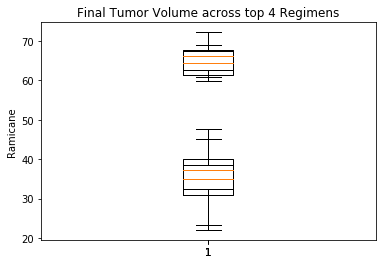

In [42]:
x_axis = np.arange(0, 4, 1) + 1

fig1, ax1 = plt.subplots()

#ax1.errorbar(x_axis,np.mean(fin_tumor_vol_top_4))

ax1.set_title('Final Tumor Volume across top 4 Regimens')
ax1.set_ylabel('Ramicane')
ax1.boxplot(fin_tumor_vol_ra)
ax1.boxplot(fin_tumor_vol_ce)
ax1.boxplot(fin_tumor_vol_in)
ax1.boxplot(fin_tumor_vol_ca)
plt.show()

# https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume
# for the Capomulin treatment.

In [ ]:
# Plot the linear regression model on top of the previous scatter plot